<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/PolynomialRegression_And_BiasVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

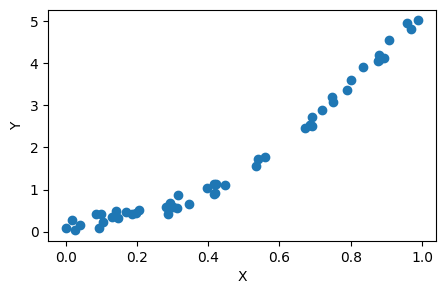

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [2]:
def adj_r2(r_sq,X,Y):
  adj_r2 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r2

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

Adj. R-square: 0.9332371047707784


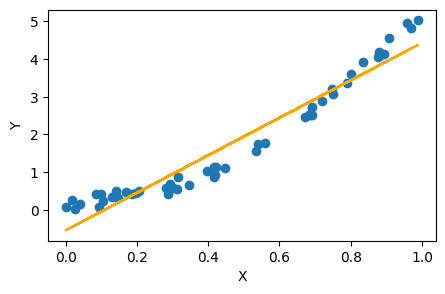

In [5]:
output = model.predict(X)
print('Adj. R-square:', adj_r2(r2_score(y,output),X,y ) )

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Adj. R-square: 0.9947910474710182


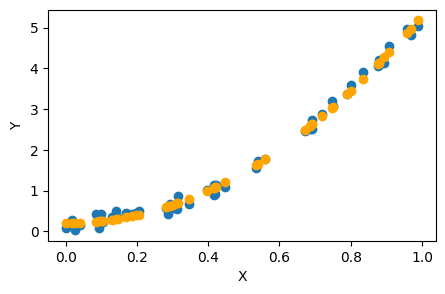

In [6]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r2(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Adj. R-square for Model Degree1: 0.9318166176382416


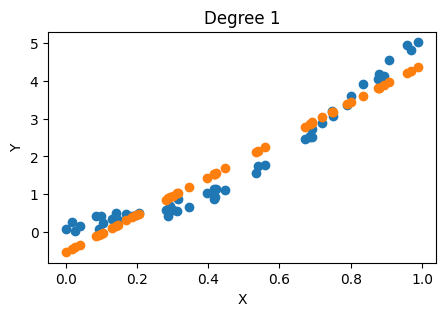

Adj. R-square for Model Degree2: 0.994564571274106


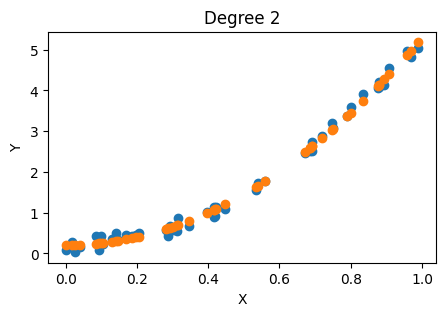

Adj. R-square for Model Degree3: 0.9944735532438161


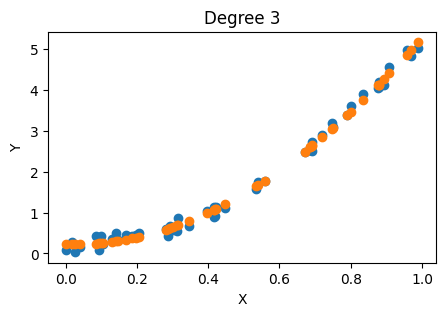

Adj. R-square for Model Degree4: 0.9954971261912255


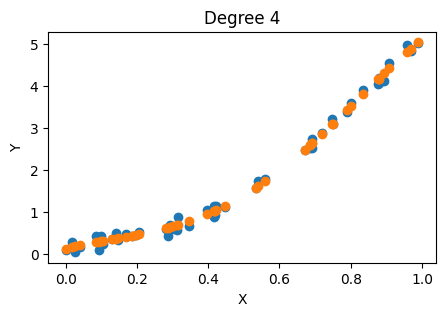

Adj. R-square for Model Degree5: 0.995442243943045


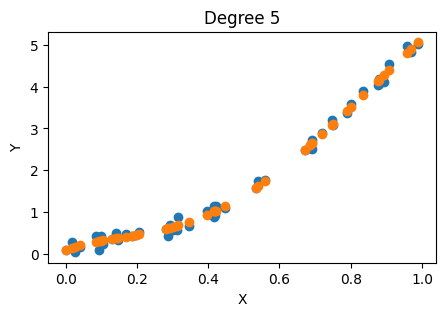

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'Adj. R-square for Model Degree{i}: {adj_r2(r2_score(y,output),X_poly_scaled,y )}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()

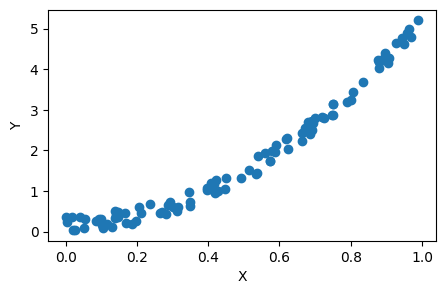

In [8]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of polynomial
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r2(train_score,X_train,y_train))
    test_scores.append(adj_r2(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

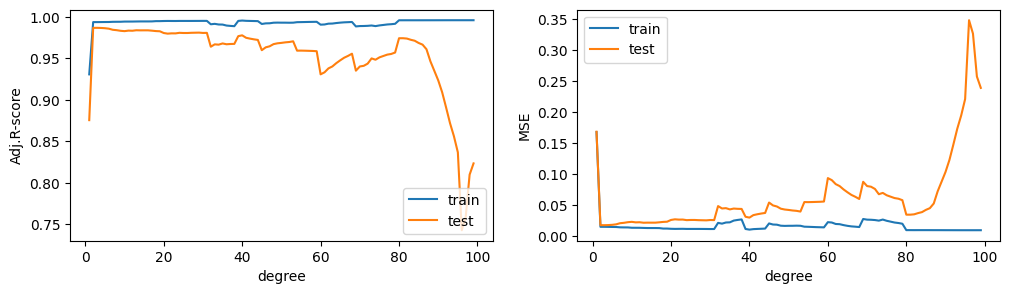

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()